In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [312]:
data = pd.read_csv("eleicoes_2006_a_2010.csv")
data2014 = pd.read_csv("eleicoes_2014.csv")

data = pd.concat([data,data2014])

categorical

In [313]:
#separar por ano
data = data.drop(['nome','sequencial_candidato','cargo','grau','estado_civil','ocupacao'],axis=1)

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12266 entries, 0 to 4935
Data columns (total 17 columns):
ano                                      12266 non-null int64
uf                                       12266 non-null object
partido                                  12266 non-null object
quantidade_doacoes                       12266 non-null int64
quantidade_doadores                      12266 non-null int64
total_receita                            12105 non-null float64
media_receita                            12105 non-null float64
recursos_de_outros_candidatos/comites    8131 non-null float64
recursos_de_pessoas_fisicas              8374 non-null float64
recursos_de_pessoas_juridicas            5068 non-null float64
recursos_proprios                        7802 non-null float64
quantidade_despesas                      12266 non-null int64
quantidade_fornecedores                  12266 non-null int64
total_despesa                            12266 non-null float64
media_despes

xxxx

In [315]:
def plotCorrelation(df,vm=0.7):
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cmap='viridis'

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vm, center=0,
                square=True, linewidths=.5,
                #annot=True, 
                #fmt="g",
                cbar_kws={"shrink": .5}
               )


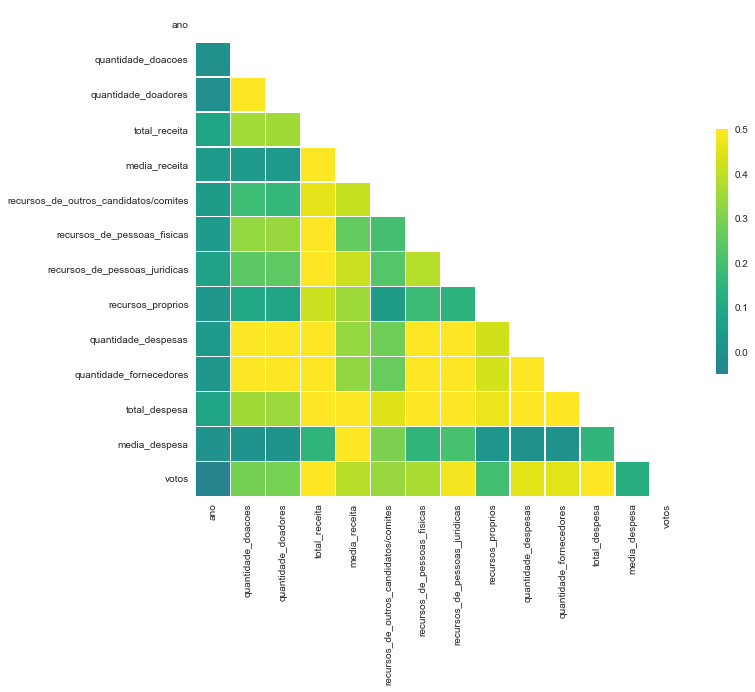

In [316]:
plotCorrelation(data,vm=0.5)

In [317]:
data = data.drop(['recursos_de_outros_candidatos/comites',
           'recursos_de_pessoas_fisicas','recursos_de_pessoas_juridicas',
           'recursos_proprios',
           'quantidade_doadores'],axis=1)

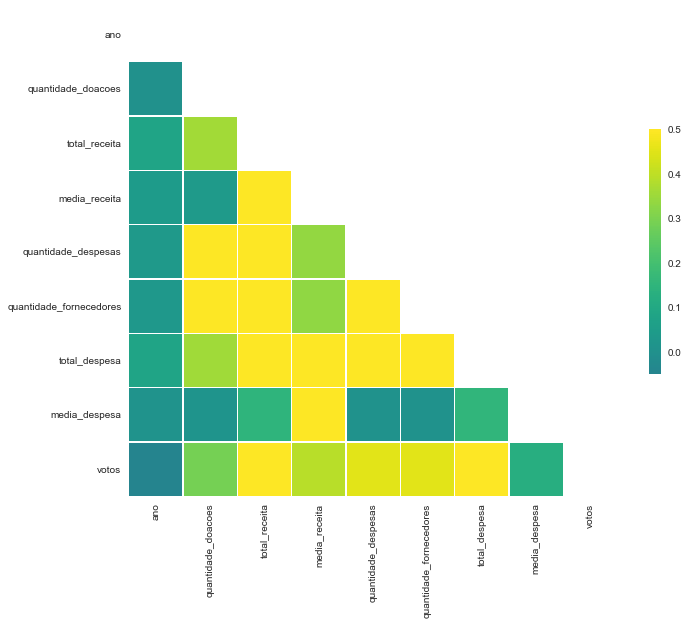

In [318]:
plotCorrelation(data,vm=0.5)

In [319]:
df = data.dropna()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano,12105.0,2010.564725,3.235976,2006.0,2006.000000,2010.000000,2014.000000,2014.00
quantidade_doacoes,12105.0,25.622635,96.412300,1.0,4.000000,9.000000,22.000000,6997.00
total_receita,12105.0,173273.085288,457893.486330,0.0,2838.930000,11800.130000,89126.200000,5836139.50
media_receita,12105.0,5750.422579,14174.233933,0.0,614.428571,1490.308333,4635.384615,500180.00
quantidade_despesas,12105.0,136.966378,426.588469,1.0,6.000000,18.000000,75.000000,9932.00
quantidade_fornecedores,12105.0,110.977117,341.702411,1.0,5.000000,16.000000,63.000000,8359.00
total_despesa,12105.0,175151.662170,466253.955013,0.0,2810.000000,11797.640000,89601.050000,7420178.58
media_despesa,12105.0,1434.163495,5091.225198,0.0,422.128571,815.000000,1536.691525,500177.00
votos,12105.0,20092.115985,46846.575159,0.0,674.000000,2323.000000,14840.000000,1524361.00


preparando os dados

In [320]:
N = ['AC','AM','AP','PA','RO','RR','TO']
NE = ['AL','BA','CE','MA','MA','PB','PE','PI','RN']
CO = ['GO','MS','MT']
SE = ['ES','MG','RJ','SP']
S = ['PR','RS','SC']

df['regiao'] = np.where(df['uf'].isin(N+NE),'NNE','SSE')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12105 entries, 0 to 4935
Data columns (total 13 columns):
ano                        12105 non-null int64
uf                         12105 non-null object
partido                    12105 non-null object
quantidade_doacoes         12105 non-null int64
total_receita              12105 non-null float64
media_receita              12105 non-null float64
quantidade_despesas        12105 non-null int64
quantidade_fornecedores    12105 non-null int64
total_despesa              12105 non-null float64
media_despesa              12105 non-null float64
sexo                       12105 non-null object
votos                      12105 non-null int64
regiao                     12105 non-null object
dtypes: float64(4), int64(5), object(4)
memory usage: 1.3+ MB


In [327]:
#dummify
ddf = df.drop(['uf'],axis=1)

features = ['quantidade_doacoes','total_receita','media_receita','quantidade_despesas','quantidade_fornecedores',
'total_despesa','media_despesa','votos']

#normalizing skew
for feature in features:
    ddf[feature] = np.log1p(ddf[feature])
    
ddf = pd.get_dummies(ddf)

In [328]:
df2014 = ddf.loc[ddf['ano'] == 2014]
ddf = ddf.loc[ddf['ano'] != 2014]

In [329]:
#dfa
Y = ddf.pop('votos')
X_train, X_validation, Y_train, Y_validation = train_test_split(ddf, Y, test_size=0.2)

Y14 = df2014.pop('votos')
Xt_14, Xv_14, Yt_14, Yv_14 = train_test_split(df2014, Y14, test_size=0.2)

## Predição


Bla

In [361]:
from sklearn.linear_model import Ridge, Lasso , LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def plot_data(X,Y):    
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')

def plot_residuals_vs_fit(X,Y, model):
    y_pred = model.predict(X)
    res = Y - y_pred
    #res = np.log(Y - y_pred)
    plt.plot(y_pred,res,'k.',color='blue',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.xlabel("predictions")
    plt.ylabel("residuals")
    #plt.yscale('log')

    
def print_poly_predictions(X,Y, model):
    plot_data(X,Y)
    #x_plot = np.array([i/200.0 for i in range(200)])
    #X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X)
    plt.plot(X,y_pred,'g.')
    #plt.axis([0,1,-1.5,2])

def print_coefficients(model):
    w = list(model.coef_)
    w.reverse()
    print (np.poly1d(w) + model.intercept_)
    
def show_results(model,best_alpha,X,Y):
    y_pred = model.predict(X)
    plot_residuals_vs_fit(X, Y, model)
    print("Results")
    if best_alpha != None:
        print("\t Best alpha: %.2f" % best_alpha)
    print("\t Mean squared error: %.2f" % mean_squared_error(Y,y_pred))
    print('\t Variance score: %.2f' % r2_score(Y,y_pred))

### Ridge

In [332]:
RidgeModel = Ridge()
RidgeModel.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [333]:
print_coefficients(RidgeModel)

         47          46          45          44           42
-0.1373 x  + 0.1373 x  + 0.2304 x  - 0.2304 x  + 0.09221 x 
           41          40           39          38         37
 - 0.2425 x  - 0.2461 x  - 0.07993 x  + 0.1685 x  + 0.204 x 
           36           35           34          33          32
 + 0.1284 x  + 0.03664 x  - 0.09654 x  - 0.3271 x  + 0.1995 x 
           30           29          28          27          25
 + 0.1332 x  - 0.01196 x  - 0.4133 x  - 0.1797 x  + 0.2454 x 
           24          23          22           20          19
 - 0.1472 x  + 0.3735 x  - 0.1211 x  + 0.07265 x  - 0.1831 x 
           18           17          16          15          13
 + 0.2445 x  - 0.09506 x  - 0.2388 x  + 0.3045 x  + 0.1923 x 
           12          11           10          9          8         7
 - 0.2932 x  + 0.2731 x  - 0.04366 x  - 0.2413 x + 0.2922 x + 1.711 x
          6         5           4           3         2
 - 1.513 x + 1.902 x + 0.04437 x - 0.01303 x + 0.314 x + 

R quadrado

Results
	 Mean squared error: 1.02
	 Variance score: 0.73


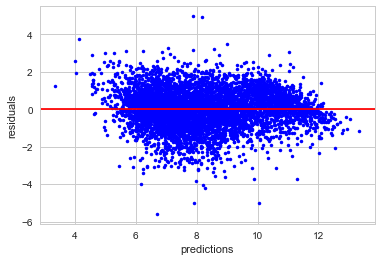

In [363]:
show_results(RidgeModel,None,X_train,Y_train)

Results
	 Mean squared error: 1.02
	 Variance score: 0.74


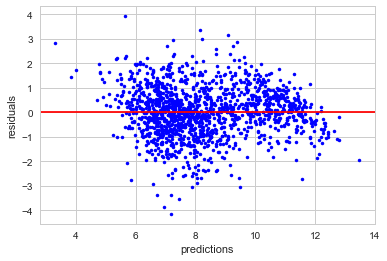

In [365]:
#print_poly_predictions(X_train,Y_train,model)
show_results(RidgeModel,None,X_validation,Y_validation)

### Lasso

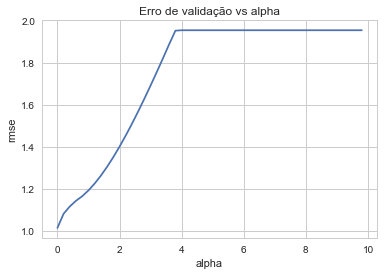

In [341]:
alphas = np.linspace(0,10,50,endpoint=False)
cv_lasso_rmse = [rmse_cv(Lasso(alpha = alpha), X_train,Y_train).mean() 
            for alpha in alphas ]

series_lasso = pd.Series(cv_lasso_rmse, index = alphas)
plot_rmse_param(series_lasso, "alpha")

Results
	 Best alpha: 1.00
	 Mean squared error: 1.42
	 Variance score: 0.64


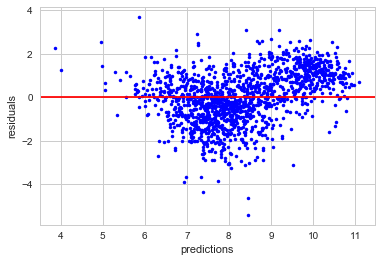

In [359]:
best_rmse, best_alpha = best_rmse_param(series_ridge)
best_LassoModel = Lasso(alpha = best_alpha)
best_LassoModel.fit(X_train, Y_train)

show_results(best_LassoModel,best_alpha,X_validation,Y_validation)

### K-nn

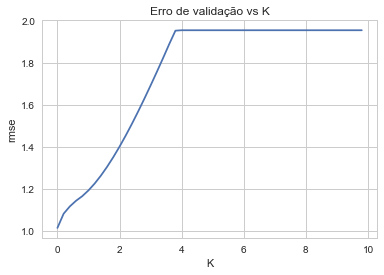

In [350]:
from sklearn.neighbors import KNeighborsRegressor

K = range(2,30)
cv_knn_rmse = [rmse_cv(KNeighborsRegressor(n_neighbors = k), X_train,Y_train).mean() 
            for k in K ]

series_knn = pd.Series(cv_knn_rmse, index = K)
plot_rmse_param(series_lasso, "K")

Results
	 Best alpha: 24.00
	 Mean squared error: 0.89
	 Variance score: 0.77


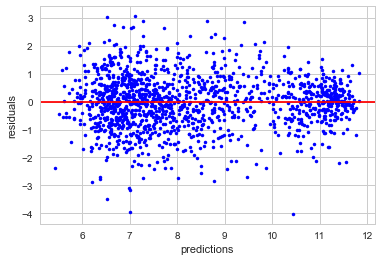

In [360]:
best_rmse, best_k = best_rmse_param(series_knn)
best_knn = KNeighborsRegressor(n_neighbors = best_k)
best_knn.fit(X_train, Y_train)


show_results(best_knn,best_k,X_validation,Y_validation)

### SVM

Results
	 Mean squared error: 3.58
	 Variance score: 0.10


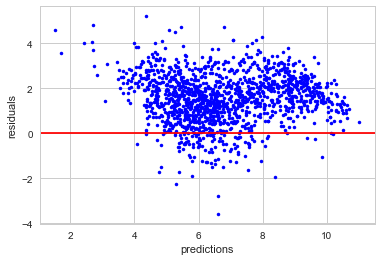

In [353]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_validation, Y_validation)


y_pred = lsvr.predict(X_validation)
plot_residuals_vs_fit(X_validation, Y_validation, lsvr)

print("Results")
print("\t Mean squared error: %.2f" % mean_squared_error(Y_validation,y_pred))
print('\t Variance score: %.2f' % r2_score(Y_validation,y_pred))

## 2014

Results
	 Mean squared error: 3.13
	 Variance score: 0.55


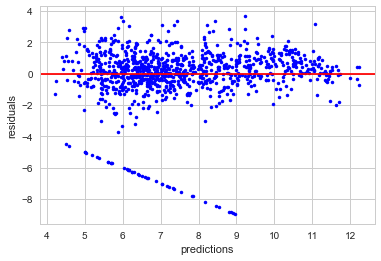

In [343]:
y_pred = RidgeModel.predict(Xv_14)
plot_residuals_vs_fit(Xv_14, Yv_14, RidgeModel)

print("Results")
print("\t Mean squared error: %.2f" % mean_squared_error(Yv_14,y_pred))
print('\t Variance score: %.2f' % r2_score(Yv_14,y_pred))



Results
	 Mean squared error: 3.10
	 Variance score: 0.55


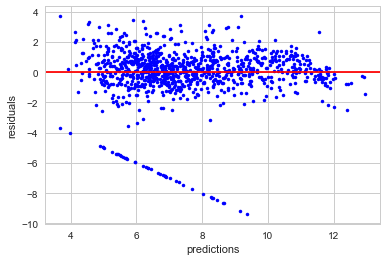

In [344]:
RidgeModel14 = Ridge()
RidgeModel14.fit(Xt_14,Yt_14)
y_pred = RidgeModel14.predict(Xv_14)


plot_residuals_vs_fit(Xv_14, Yv_14, RidgeModel14)

print("Results")
print("\t Mean squared error: %.2f" % mean_squared_error(Yv_14,y_pred))
print('\t Variance score: %.2f' % r2_score(Yv_14,y_pred))
